# <u> Pengelompokan Spektral </u>

Dalam pengelompokan spektral, titik data diperlakukan sebagai simpul grafik. Dengan demikian, pengelompokan spektral merupakan masalah pembagian grafik. Simpul kemudian dipetakan ke ruang berdimensi rendah yang dapat dengan mudah dipisahkan untuk membentuk kluster. Tidak ada asumsi yang dibuat tentang bentuk/wujud kluster. Tujuan pengelompokan spektral adalah untuk mengelompokkan data yang terhubung tetapi tidak harus kompak atau dikelompokkan dalam batas cembung.

### <u> Pengelompokan Spektral vs. Kmeans </u>

- <b><u> Kekompakan </u></b> — Titik-titik yang terletak berdekatan satu sama lain berada dalam kluster yang sama dan kompak di sekitar pusat kluster. Kedekatan dapat diukur dari jarak antara pengamatan. Misalnya: <b> Pengelompokan K-Means </b>
- <b><u> Konektivitas </u></b> — Titik-titik yang terhubung atau tepat di samping satu sama lain dimasukkan ke dalam kluster yang sama. Sekalipun jarak antara 2 titik lebih pendek, jika mereka tidak terhubung, mereka tidak akan terkelompok bersama. <b> Spectral Clustering </b> adalah teknik yang mengikuti pendekatan ini.



Set data tempat pengelompokan spektral diterapkan untuk pengelompokan:



K-means akan gagal mengelompokkan ini secara efektif, bahkan ketika jumlah sebenarnya dari kluster K diketahui oleh algoritme. K-means, sebagai algoritma <i> pengelompokan data </i>, ideal untuk menemukan gugus bola di mana semua anggota setiap gugus berada dalam jarak yang dekat satu sama lain (dalam pengertian Euclidean).

Pengelompokan spektral lebih umum (dan kuat) karena jika kita hanya menggunakan Jarak Eucledean dalam matriks kesamaannya, maka akan berperilaku seperti k-means. Namun, kebalikannya tidak benar.

Jika kita memiliki titik data 𝑃 yang masing-masing memiliki dimensi/fitur 𝑁, matriks masukan untuk K-means akan menjadi 𝑁 x 𝑃, sedangkan matriks masukan untuk pengelompokan spektral akan menjadi 𝑃 x 𝑃. Pengelompokan spektral tidak peduli dengan jumlah fitur yang kita gunakan (kernel Gaussian yang dapat dianggap sebagai transformasi fitur berdimensi tak terbatas sangat populer saat menggunakan pengelompokan spektral). Kita akan menghadapi kesulitan dalam menerapkan pengelompokan spektral (setidaknya versi vanilla) ke kumpulan data yang sangat besar (𝑃 besar). ### <u> Algoritma: </u>
- Proyeksikan data ke matriks $R^{n}$
- Tentukan matriks Afinitas A, menggunakan Kernel Gaussian K atau matriks Adjacency
- Bangun Graph Laplacian dari A (yaitu putuskan normalisasi)
- Selesaikan masalah Nilai Eigen
- Pilih k vektor eigen yang sesuai dengan k nilai eigen terendah (atau tertinggi) untuk menentukan subruang k-dimensi
- Bentuk kluster di subruang ini menggunakan k-means

#### <u> Matriks Afinitas: </u>

Pertama-tama kita buat grafik tak berarah G = (V, E) dengan himpunan titik V = {v1, v2, …, vn} = 1, 2, …, n pengamatan dalam data.

- <b> <u> Grafik Epsilon-tetangga: </u> </b> Parameter epsilon ditetapkan sebelumnya. Kemudian setiap titik dihubungkan ke semua titik yang terletak di radius epsilon-nya. Jika semua jarak antara dua titik memiliki skala yang sama, maka biasanya bobot sisinya, yaitu jarak antara dua titik, tidak disimpan karena tidak memberikan informasi tambahan apa pun. Jadi, dalam kasus ini, grafik yang dibangun adalah grafik tak berarah dan tak berbobot.
- <b> <u> K-Nearest Neighbours: </u> </b> Parameter k ditetapkan sebelumnya. Kemudian, untuk dua simpul u dan v, sisi diarahkan dari u ke v hanya jika v berada di antara k-tetangga terdekat u. Perhatikan bahwa ini mengarah pada pembentukan grafik berbobot dan berarah karena tidak selalu terjadi bahwa untuk setiap u yang memiliki v sebagai salah satu k-tetangga terdekat, akan terjadi kasus yang sama untuk v yang memiliki u di antara k-tetangga terdekatnya. Untuk membuat grafik ini tidak berarah, salah satu pendekatan berikut diikuti: - Arahkan sisi dari u ke v dan dari v ke u jika v berada di antara k-tetangga terdekat u <b> ATAU </b> u berada di antara k-tetangga terdekat v. - Arahkan sisi dari u ke v dan dari v ke u jika v berada di antara k-tetangga terdekat u <b> DAN </b> u berada di antara k-tetangga terdekat v. - <b> <u> Grafik Terhubung Penuh: </u></b> Untuk membangun grafik ini, setiap titik dihubungkan dengan sisi tidak berarah yang dibobot oleh jarak antara dua titik ke setiap titik lainnya. Karena pendekatan ini digunakan untuk memodelkan hubungan lingkungan lokal, maka biasanya metrik kesamaan Gaussian digunakan untuk menghitung jarak.

$$S(x_i, x_j) = exp(-\frac{||x_i - x_j||^2}{2\sigma^2})$$

Jadi, ketika kita membuat matriks ketetanggaan untuk salah satu grafik ini, Aij ~ 1 ketika titik-titiknya berdekatan dan Aij → 0 jika titik-titiknya berjauhan.

Pertimbangkan grafik berikut dengan simpul 1 hingga 4, bobot (atau kesamaan) wij dan matriks ketetanggaannya:



<b><u>Metrik :</u></b>

Metrik afinitas menentukan seberapa dekat, atau mirip, dua titik di ruang kita. Kita akan menggunakan Kernel Gaussian dan bukan metrik Euclidean standar.

Diberikan 2 titik data $x_{i},x_{j}$ (diproyeksikan dalam $R^{n}$ ), kita mendefinisikan Afinitas $A_{i,j}$ yang positif, simetris, dan bergantung pada jarak Euclidean $\Vert x_{i}-x_{j}\Vert$ antara titik-titik data

$$A_{ij} = {e}^{-\alpha \Vert x_{i}-x_{j}\Vert^2 }$$

Kita mungkin memberikan batas R yang keras, sehingga

$A_{ij} = 0$ jika $\Vert x_{i}-x_{j}\Vert^2 \geq R$

$A_{i,j}\simeq 1$ ketika titik-titik tersebut berdekatan dalam $R^{n}$ , dan $A_{i,j}\rightarrow 0$ jika titik-titik $x_{i}$, $x_{j}$ berjauhan. Titik data yang berdekatan berada dalam klaster yang sama. Titik data dalam klaster yang berbeda berjauhan. Namun, titik data dalam klaster yang sama mungkin juga berjauhan—bahkan lebih jauh daripada titik dalam klaster yang berbeda. Tujuan kita kemudian adalah mengubah ruang sehingga ketika 2 titik $x_{i}$, $x_{j}$ berdekatan, mereka selalu berada dalam klaster yang sama, dan ketika mereka berjauhan, mereka berada dalam klaster yang berbeda. Umumnya kita menggunakan Gaussian Kernel K secara langsung, atau kita membentuk Graph Laplacian A.

<b><u>Graph Laplacian</u></b> hanyalah representasi matriks lain dari sebuah grafik. Hal ini dapat dihitung sebagai:

- Laplacian Sederhana $L=D-A$
- Laplacian Ternormalisasi $L_{N}=D^{-1/2}LD^{-1/2}$
- Laplacian Tergeneralisasi $L_{G} = D^{-1}L$
- Laplacian Relaksasi $L_{\rho} = L-\rho D $
- Laplacian Ng, Jordan, & Weiss $L_{NJW}=D^{-1/2}AD^{-1/2}, di mana A_{i,i}=0 $

$L = D - A$ di mana A adalah matriks Adjacency dan D adalah Matriks Derajat.

$$D_i = \sum_{j|(i,j) \in E} w_{ij}$$
$$ L_{ij} =
\begin{cases}
d_i & \quad \text{jika } i = j\\
-w_{ij} & \quad \text{jika } i , j \in E \\
0 & \quad \text{jika } i , j \notin E
\end{cases}
$$



Seluruh tujuan menghitung Graph Laplacian L adalah untuk menemukan nilai eigen dan vektor eigen untuknya, guna menanamkan titik data ke dalam ruang berdimensi rendah.

<b><u>Masalah Ruang Eigen Klaster</u></b>

Untuk mengidentifikasi klaster yang baik, L Laplacian harus kira-kira merupakan diagonal blok, dengan setiap blok mendefinisikan klaster. Jika kita memiliki 3 klaster utama (C1, C2, C3), kita akan mengharapkan

$$\begin{matrix}
L_{1,1} & L_{1,2} & L_{1,3} \\
L_{2,1} & L_{2,2} & L_{2,3} \\
L_{3,1} & L_{3,2} & L_{3,3}
\end{matrix}
\sim
\begin{matrix}
L_{1,1} & 0 & 0 \\
0 & L_{2,2} & 0 \\
0 & 0 & L_{3,3}
\end{matrix}$$



Kami juga berharap bahwa 3 nilai eigen & vektor eigen terendah (\lambda_{i},v_{i}) dari L masing-masing sesuai dengan klaster yang berbeda.

Untuk klaster K, hitung vektor eigen K pertama. ${v_1, v_2, ...v_k}$. Susun vektor secara vertikal untuk membentuk matriks dengan vektor eigen sebagai kolom. Representasikan setiap node sebagai baris yang sesuai dari matriks baru ini, baris-baris ini membentuk vektor fitur dari node. Gunakan Kmeans untuk mengelompokkan titik-titik ini ke dalam k klaster $C_1, C_2 ...C_k$

### <u> Contoh </u>

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 

In [5]:
df = pd.read_csv('../data/CC GENERAL.csv')

df = df.drop('CUST_ID', axis = 1) 
df.fillna(method ='ffill', inplace = True) 
df.head(2)

C:\Users\ikhwa\AppData\Local\Temp\ipykernel_11928\2021678768.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method ='ffill', inplace = True)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [6]:
# Preprocessing the data to make it visualizable 
  
# Scaling the Data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(df) 
  
# Normalizing the Data 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2) 

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827


<u>Building the Clustering models and Visualizing the clustering</u>

Two different Spectral Clustering models with different values for the parameter ‘affinity’.

<b> <u> Affinity matrix with Gaussian Kernel  </u></b>

<b> "affinity" = "rbf" </b>

In [7]:
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

d:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\Anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^

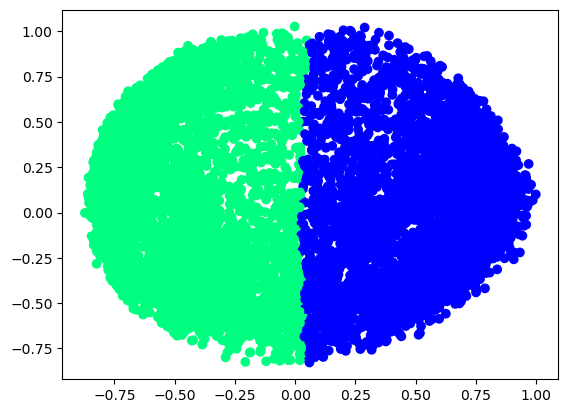

In [8]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = SpectralClustering(n_clusters = 2, affinity ='rbf') .fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

<b> <u> Matriks afinitas dengan Jarak Euclidean </u> </ub>

<b>affinity = ‘nearest_neighbors’ </b>

In [9]:
# Building the clustering model 
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_nn = spectral_model_nn.fit_predict(X_principal)

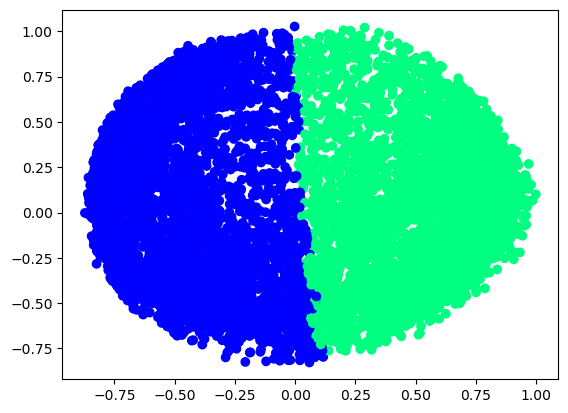

In [10]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') .fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

<b> Performance Evaluation </b>

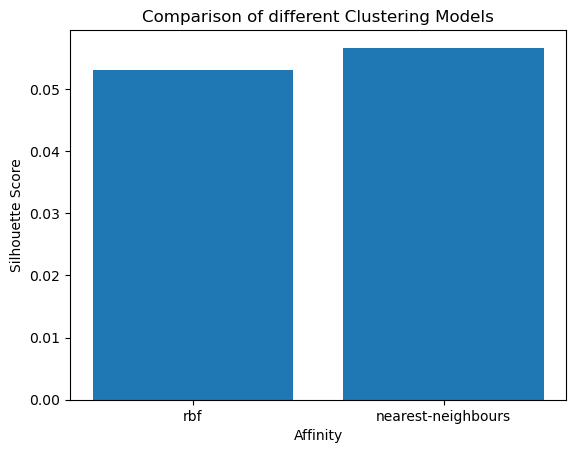

[0.05300611480757429, 0.05667039590382262]


In [11]:
# List of different values of affinity 
affinity = ['rbf', 'nearest-neighbours'] 
  
# List of Silhouette Scores 
s_scores = [] 
  
# Evaluating the performance 
s_scores.append(silhouette_score(df, labels_rbf)) 
s_scores.append(silhouette_score(df, labels_nn)) 
  
# Plotting a Bar Graph to compare the models 
plt.bar(affinity, s_scores) 
plt.xlabel('Affinity') 
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different Clustering Models') 
plt.show() 

print(s_scores)